In [1]:
import numpy as np
import pandas as pd
# 数据文件地址
data=pd.read_excel(r'C:\Users\江东大宝\Desktop\2016-2022年城区空气质量指数.xlsx')
data

,日期,监测点位,二氧化硫,二氧化氮,可吸入颗粒物,一氧化碳,臭氧,细颗粒物,空气质量指数,首要污染物
0,2016-01-01,城区,35,94,109,34,11,153,153,PM2.5
1,2016-01-02,城区,47,102,123,41,14,185,185,PM2.5
2,2016-01-03,城区,28,85,94,41,10,155,155,PM2.5
3,2016-01-04,城区,12,68,108,48,12,237,237,PM2.5
4,2016-01-05,城区,8,44,59,45,6,130,130,PM2.5
...,...,...,...,...,...,...,...,...,...,...
2552,2022-12-27,城区,8,53,78,26,25,125,125,PM2.5
2553,2022-12-28,城区,8,52,94,29,28,169,169,PM2.5
2554,2022-12-29,城区,9,65,92,28,33,155,155,PM2.5
2555,2022-12-30,城区,10,85,84,29,33,129,129,PM2.5


In [2]:
# 数据预处理
# 将数据中0替换成缺失值
data=data.replace(0,np.NaN)

# 提取年月
data['年']=data['日期'].apply(lambda x:x.year)
month=data['日期'].apply(lambda x:x.month)
# 设定划分季度
quarter_month={'1':'一季度','2':'一季度','3':'一季度',
               '4':'二季度','5':'二季度','6':'二季度',
               '7':'三季度','8':'三季度','9':'三季度',
              '10':'四季度','11':'四季度','12':'四季度'}
data['季度']=month.map(lambda x:quarter_month[str(x)])
# 划分空气质量等级
bins=[0,50,100,150,200,300,1000]
data['等级']=pd.cut(data['空气质量指数'],bins,labels=['一级优','二级良','三级轻度污染','四级中度污染','五级重度污染','六级严重污染'])
print('对AQI的分组结果：\n{0}'.format(data[['日期','空气质量指数','等级','季度']]))
data

对AQI的分组结果：
             日期  空气质量指数      等级   季度
0    2016-01-01     153  四级中度污染  一季度
1    2016-01-02     185  四级中度污染  一季度
2    2016-01-03     155  四级中度污染  一季度
3    2016-01-04     237  五级重度污染  一季度
4    2016-01-05     130  三级轻度污染  一季度
...         ...     ...     ...  ...
2552 2022-12-27     125  三级轻度污染  四季度
2553 2022-12-28     169  四级中度污染  四季度
2554 2022-12-29     155  四级中度污染  四季度
2555 2022-12-30     129  三级轻度污染  四季度
2556 2022-12-31     165  四级中度污染  四季度

[2557 rows x 4 columns]


,日期,监测点位,二氧化硫,二氧化氮,可吸入颗粒物,一氧化碳,臭氧,细颗粒物,空气质量指数,首要污染物,年,季度,等级
0,2016-01-01,城区,35,94,109,34,11,153,153,PM2.5,2016,一季度,四级中度污染
1,2016-01-02,城区,47,102,123,41,14,185,185,PM2.5,2016,一季度,四级中度污染
2,2016-01-03,城区,28,85,94,41,10,155,155,PM2.5,2016,一季度,四级中度污染
3,2016-01-04,城区,12,68,108,48,12,237,237,PM2.5,2016,一季度,五级重度污染
4,2016-01-05,城区,8,44,59,45,6,130,130,PM2.5,2016,一季度,三级轻度污染
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2022-12-27,城区,8,53,78,26,25,125,125,PM2.5,2022,四季度,三级轻度污染
2553,2022-12-28,城区,8,52,94,29,28,169,169,PM2.5,2022,四季度,四级中度污染
2554,2022-12-29,城区,9,65,92,28,33,155,155,PM2.5,2022,四季度,四级中度污染
2555,2022-12-30,城区,10,85,84,29,33,129,129,PM2.5,2022,四季度,三级轻度污染


In [3]:
# 储存预处理完毕的数据集
data.to_excel((r'C:\Users\江东大宝\Desktop\2016-2022年城区空气质量指数_预处理完毕.xlsx'), sheet_name='Sheet1', index=False)

In [4]:
# 解决打印对不齐
# 将不明确的全角字符宽度视为双倍宽度。默认值为False。
pd.set_option('display.unicode.ambiguous_as_wide', True)
# 将全角字符视为双倍宽度，半角字符视为单倍宽度。默认值为False。
pd.set_option('display.unicode.east_asian_width', True)
# 设置打印宽度
pd.set_option('display.width', 200)

In [5]:
print('各季度空气质量指数和可吸入颗粒物的描述统计量:\n',data.groupby(data['季度'])[['空气质量指数','可吸入颗粒物']].apply(lambda x:x.describe()))

各季度空气质量指数和可吸入颗粒物的描述统计量:
               空气质量指数  可吸入颗粒物
季度                                    
一季度 count    632.000000    632.000000
       mean      91.518987     66.859177
       std       41.792063     25.018423
       min       20.000000      6.000000
       25%       63.000000     52.000000
       50%       83.000000     66.000000
       75%      109.000000     82.250000
       max      265.000000    165.000000
三季度 count    644.000000    644.000000
       mean      74.228261     43.973602
       std       31.361769     16.146710
       min       22.000000      8.000000
       25%       49.750000     32.000000
       50%       68.000000     44.000000
       75%       95.000000     54.250000
       max      193.000000     99.000000
二季度 count    637.000000    637.000000
       mean      74.599686     55.684458
       std       31.778838     27.692482
       min       23.000000     10.000000
       25%       53.000000     42.000000
       50%       72.000000     55.000000
       75%    

In [6]:
# 对空气质量指数列的数据进行降序排列，然后返回前n个（这里n=10）
def top(df,n=10,column='空气质量指数'):
    return df.sort_values(by=column,ascending=False)[:n] 

In [7]:
print('空气质量最差的5天:\n',top(data,n=5)[['日期','空气质量指数','可吸入颗粒物','等级']])

空气质量最差的5天:
            日期  空气质量指数  可吸入颗粒物          等级
2523 2022-11-28           479            22  六级严重污染
491  2017-05-06           474           474  六级严重污染
835  2018-04-15           273           273  五级重度污染
430  2017-03-06           265           143  五级重度污染
1064 2018-11-30           252           132  五级重度污染


In [8]:
print('各季度空气质量最差的3天:\n',data.groupby(data['季度']).apply(lambda x:top(x,n=3)[['日期','空气质量指数','可吸入颗粒物','等级']]))

各季度空气质量最差的3天:
                   日期  空气质量指数  可吸入颗粒物          等级
季度                                                            
一季度 430  2017-03-06           265           143  五级重度污染
       17   2016-01-18           248           127  五级重度污染
       3    2016-01-04           237           108  五级重度污染
三季度 2039 2021-08-01           193            63  四级中度污染
       2079 2021-09-10           175            57  四级中度污染
       1327 2019-08-20           171            61  四级中度污染
二季度 491  2017-05-06           474           474  六级严重污染
       835  2018-04-15           273           273  五级重度污染
       836  2018-04-16           192           192  四级中度污染
四季度 2523 2022-11-28           479            22  六级严重污染
       1064 2018-11-30           252           132  五级重度污染
       703  2017-12-04           226           105  五级重度污染


In [9]:
print('各季度空气质量情况:\n',pd.crosstab(data['等级'],data['季度'],margins=True,margins_name='总计',normalize=False))

各季度空气质量情况:
 季度          一季度  三季度  二季度  四季度  总计
等级                                              
一级优            82     175     129     113   499
二级良           350     340     414     346  1450
三级轻度污染     139     120      87     147   493
四级中度污染      45       9       5      31    90
五级重度污染      16       0       1       6    23
六级严重污染       0       0       1       1     2
总计             632     644     637     644  2557


In [10]:
# 得到分类变量'等级'的哑变量,生成一个二值变量
pd.get_dummies(data['等级'])
# 数据添加
data.join(pd.get_dummies(data['等级']))

,日期,监测点位,二氧化硫,二氧化氮,可吸入颗粒物,一氧化碳,臭氧,细颗粒物,空气质量指数,首要污染物,年,季度,等级,一级优,二级良,三级轻度污染,四级中度污染,五级重度污染,六级严重污染
0,2016-01-01,城区,35,94,109,34,11,153,153,PM2.5,2016,一季度,四级中度污染,0,0,0,1,0,0
1,2016-01-02,城区,47,102,123,41,14,185,185,PM2.5,2016,一季度,四级中度污染,0,0,0,1,0,0
2,2016-01-03,城区,28,85,94,41,10,155,155,PM2.5,2016,一季度,四级中度污染,0,0,0,1,0,0
3,2016-01-04,城区,12,68,108,48,12,237,237,PM2.5,2016,一季度,五级重度污染,0,0,0,0,1,0
4,2016-01-05,城区,8,44,59,45,6,130,130,PM2.5,2016,一季度,三级轻度污染,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2022-12-27,城区,8,53,78,26,25,125,125,PM2.5,2022,四季度,三级轻度污染,0,0,1,0,0,0
2553,2022-12-28,城区,8,52,94,29,28,169,169,PM2.5,2022,四季度,四级中度污染,0,0,0,1,0,0
2554,2022-12-29,城区,9,65,92,28,33,155,155,PM2.5,2022,四季度,四级中度污染,0,0,0,1,0,0
2555,2022-12-30,城区,10,85,84,29,33,129,129,PM2.5,2022,四季度,三级轻度污染,0,0,1,0,0,0


In [11]:
# 简单随机抽样
# 随机数种子
np.random.seed(0)
# 指定范围抽取10个
sampler=np.random.randint(0,len(data),10)
print("简单随机抽样如下：")
print(sampler)
data.take(sampler)

简单随机抽样如下：
[1653  835  763 1731 1033  277 1778 1828 2362  705]


,日期,监测点位,二氧化硫,二氧化氮,可吸入颗粒物,一氧化碳,臭氧,细颗粒物,空气质量指数,首要污染物,年,季度,等级
1653,2020-07-11,城区,6,27,28,20,31,28,31,NaN,2020,三季度,一级优
835,2018-04-15,城区,5,64,273,19,45,85,273,PM10,2018,二季度,五级重度污染
763,2018-02-02,城区,13,68,80,18,31,75,80,PM10,2018,一季度,二级良
1731,2020-09-27,城区,6,49,56,23,98,53,98,O3_8h,2020,三季度,二级良
1033,2018-10-30,城区,15,108,80,31,38,74,108,NO2,2018,四季度,三级轻度污染
277,2016-10-04,城区,10,73,67,31,61,63,73,NO2,2016,四季度,二级良
1778,2020-11-13,城区,12,95,72,23,39,63,95,NO2,2020,四季度,二级良
1828,2021-01-02,城区,13,85,69,29,24,87,87,PM2.5,2021,一季度,二级良
2362,2022-06-20,城区,8,20,26,25,58,19,58,O3_8h,2022,二季度,二级良
705,2017-12-06,城区,22,100,104,41,9,178,178,PM2.5,2017,四季度,四级中度污染


In [12]:
# 随机打乱取前十个
print("重新打乱抽样结果如下：")
sampler=np.random.permutation(len(data))[:10]
print(sampler)
data.take(sampler)

重新打乱抽样结果如下：
[1602 1960 1174  634 1661  723  619  682  195  641]


,日期,监测点位,二氧化硫,二氧化氮,可吸入颗粒物,一氧化碳,臭氧,细颗粒物,空气质量指数,首要污染物,年,季度,等级
1602,2020-05-21,城区,8,44,51,20,50,45,51,PM10,2020,二季度,二级良
1960,2021-05-14,城区,5,40,38,25,49,29,49,NaN,2021,二季度,一级优
1174,2019-03-20,城区,9,54,60,27,47,55,60,PM10,2019,一季度,二级良
634,2017-09-26,城区,6,37,51,30,50,42,51,PM10,2017,三季度,二级良
1661,2020-07-19,城区,5,22,24,15,56,30,56,O3_8h,2020,三季度,二级良
723,2017-12-24,城区,16,94,105,33,34,173,173,PM2.5,2017,四季度,四级中度污染
619,2017-09-11,城区,6,32,35,19,46,23,46,NaN,2017,三季度,一级优
682,2017-11-13,城区,5,62,55,26,10,73,73,PM2.5,2017,四季度,二级良
195,2016-07-14,城区,4,33,51,19,60,46,60,O3_8h,2016,三季度,二级良
641,2017-10-03,城区,5,24,11,18,26,10,26,NaN,2017,四季度,一级优


In [13]:
# 条件抽样
print("条件抽样结果如下：")
data.loc[data['等级']=='二级良',:]

条件抽样结果如下：


,日期,监测点位,二氧化硫,二氧化氮,可吸入颗粒物,一氧化碳,臭氧,细颗粒物,空气质量指数,首要污染物,年,季度,等级
20,2016-01-21,城区,8,42,52,18,14,94,94,PM2.5,2016,一季度,二级良
21,2016-01-22,城区,7,32,48,18,24,80,80,PM2.5,2016,一季度,二级良
22,2016-01-23,城区,16,29,65,20,35,93,93,PM2.5,2016,一季度,二级良
23,2016-01-24,城区,8,25,93,12,35,38,93,PM10,2016,一季度,二级良
24,2016-01-25,城区,12,60,88,16,36,55,88,PM10,2016,一季度,二级良
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,2022-12-19,城区,14,70,60,24,32,63,70,NO2,2022,四季度,二级良
2545,2022-12-20,城区,13,74,64,24,23,82,82,PM2.5,2022,四季度,二级良
2548,2022-12-23,城区,11,73,64,22,28,54,73,NO2,2022,四季度,二级良
2549,2022-12-24,城区,13,70,71,23,42,84,84,PM2.5,2022,四季度,二级良


In [14]:
data

,日期,监测点位,二氧化硫,二氧化氮,可吸入颗粒物,一氧化碳,臭氧,细颗粒物,空气质量指数,首要污染物,年,季度,等级
0,2016-01-01,城区,35,94,109,34,11,153,153,PM2.5,2016,一季度,四级中度污染
1,2016-01-02,城区,47,102,123,41,14,185,185,PM2.5,2016,一季度,四级中度污染
2,2016-01-03,城区,28,85,94,41,10,155,155,PM2.5,2016,一季度,四级中度污染
3,2016-01-04,城区,12,68,108,48,12,237,237,PM2.5,2016,一季度,五级重度污染
4,2016-01-05,城区,8,44,59,45,6,130,130,PM2.5,2016,一季度,三级轻度污染
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2022-12-27,城区,8,53,78,26,25,125,125,PM2.5,2022,四季度,三级轻度污染
2553,2022-12-28,城区,8,52,94,29,28,169,169,PM2.5,2022,四季度,四级中度污染
2554,2022-12-29,城区,9,65,92,28,33,155,155,PM2.5,2022,四季度,四级中度污染
2555,2022-12-30,城区,10,85,84,29,33,129,129,PM2.5,2022,四季度,三级轻度污染


Text(2523, 459, '空气质量最差日')

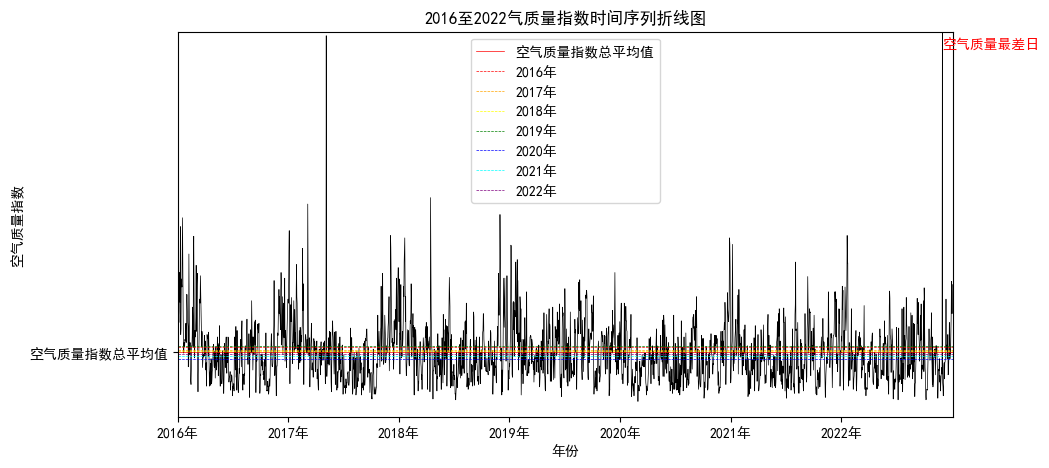

In [15]:
# 绘图
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False

# 导入数据
data=pd.read_excel(r'C:\Users\江东大宝\Desktop\2016-2022年城区空气质量指数_预处理完毕.xlsx')
# 创建图形
plt.figure(figsize=(10,5))
# 绘制空气质量折线
plt.plot(data['空气质量指数'],color='black',linestyle='-',linewidth=0.5)
# 空气质量平均值
plt.axhline(y=data['空气质量指数'].mean(),color='red', linestyle='-',linewidth=0.5,label='空气质量指数总平均值')
# 提取年
data['年']=data['日期'].apply(lambda x:x.year)
# 提取空气质量年平均
AQI_mean=data['空气质量指数'].groupby(data['年']).mean().values
# 设定颜色
year=['2016年','2017年','2018年','2019年','2020年','2021年','2022年']
col=['red','orange','yellow','green','blue','cyan','purple']
# 绘制每年平均
for i in range(7):
    plt.axhline(y=AQI_mean[i],color=col[i], linestyle='--',linewidth=0.5,label=year[i])

# 标题 坐标轴
plt.title('2016至2022气质量指数时间序列折线图')
plt.xlabel('年份')
plt.ylabel('空气质量指数')
# 设定所有数据都会被显示
plt.xlim(xmax=len(data), xmin=1)
plt.ylim(ymax=data['空气质量指数'].max(),ymin=1)
# 添加文本
plt.yticks([data['空气质量指数'].mean()],['空气质量指数总平均值'])
plt.xticks([1,365,365*2,365*3,365*4,365*5,365*6],['2016年','2017年','2018年','2019年','2020年','2021年','2022年'])
# 添加图例
plt.legend(loc='best')
# 标出空气质量最差的一天
plt.text(x=list(data['空气质量指数']).index(data['空气质量指数'].max()),y=data['空气质量指数'].max()-20,s='空气质量最差日',color='red')

Text(0.5, 1.0, '空气质量整体情况的饼图')

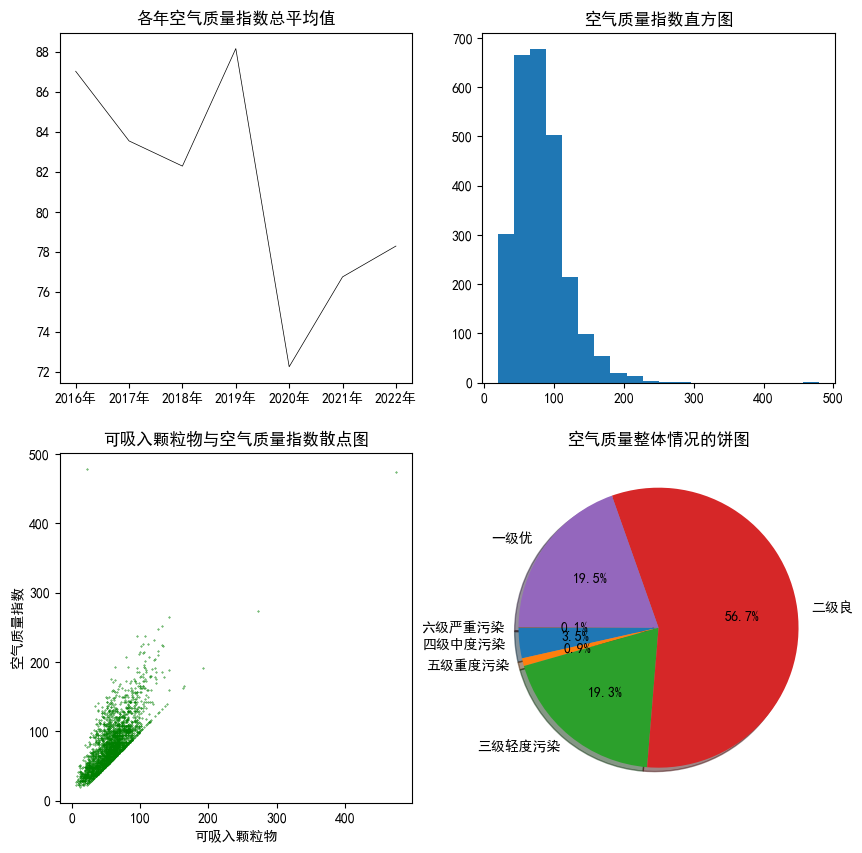

In [16]:
# 添加绘图
%matplotlib inline
# 控制忽略所有警告信息
import warnings
warnings.filterwarnings(action = 'ignore')

# 设定大小 划分区域
plt.figure(figsize=(10,10))

# 左上折线图
plt.subplot(2,2,1)
plt.plot(AQI_mean,color='black',linestyle='-',linewidth=0.5)
plt.title('各年空气质量指数总平均值')
plt.xticks([0, 1, 2, 3, 4, 5, 6],['2016年','2017年','2018年','2019年','2020年','2021年','2022年'])

# 右上直方图
plt.subplot(2,2,2)
plt.hist(data['空气质量指数'], bins=20)
plt.title('空气质量指数直方图')

# 左下散点图
plt.subplot(2,2,3)
plt.scatter(data['可吸入颗粒物'],data['空气质量指数'],s=0.5,c='green',marker='.')
plt.title('可吸入颗粒物与空气质量指数散点图')
plt.xlabel('可吸入颗粒物')
plt.ylabel('空气质量指数')

# 右下饼图
plt.subplot(2,2,4)
tmp=pd.value_counts(data['等级'],sort=False)  #等同：tmp=data['质量等级'].value_counts()
share=tmp/sum(tmp)
labels=tmp.index
explode = [0, 0, 0, 0, 0,0]
plt.pie(share, explode = explode,labels = labels, autopct = '%3.1f%%',startangle = 180, shadow = True)
plt.title('空气质量整体情况的饼图')

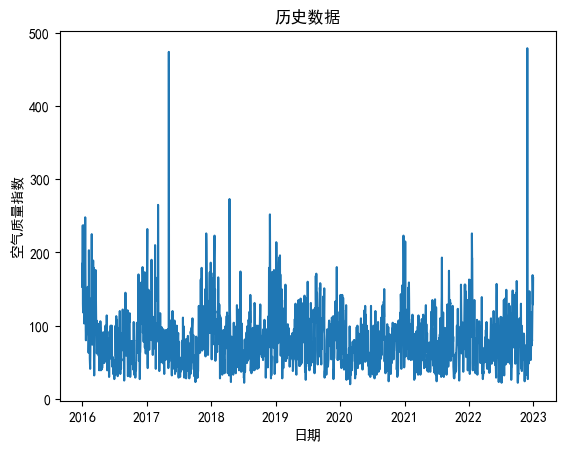

2023-01-01    132.196859
2023-01-02    115.139998
2023-01-03    106.270832
2023-01-04    101.659075
2023-01-05     99.261070
                 ...    
2023-12-27     96.663476
2023-12-28     96.663476
2023-12-29     96.663476
2023-12-30     96.663476
2023-12-31     96.663476
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


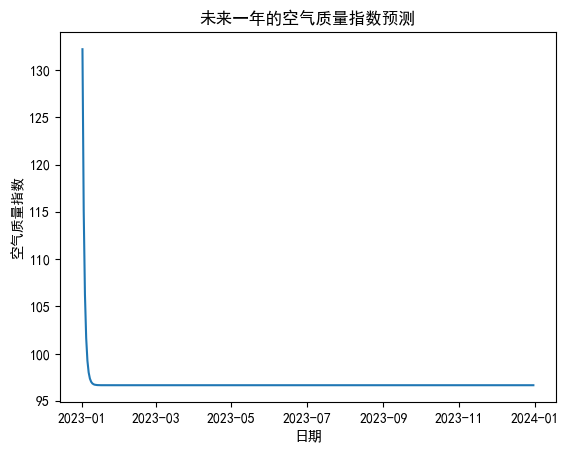

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False

# 读取Excel文件并转换为时间序列
df = pd.read_excel(r'C:\Users\江东大宝\Desktop\2016-2022年城区空气质量指数_预处理完毕.xlsx')
df['日期'] = pd.to_datetime(df['日期'])
df_data = df[['日期', '空气质量指数']]
df_data.set_index('日期', inplace=True)

# 将时间序列数据转换为带有固定日度频率的形式
df_data_daily = df_data.resample('D').mean()

# 绘制AQI时间序列图
plt.plot(df_data)
plt.xlabel('日期')
plt.ylabel('空气质量指数')
plt.title('历史数据')
plt.show()


# 拟合ARIMA模型并进行预测
model = ARIMA(df_data_daily, order=(1, 1, 1))
results = model.fit()
forecast = results.forecast(steps=365)  # 预测未来365天的数据

# 显示预测结果
print(forecast)

plt.plot(forecast)
plt.xlabel('日期')
plt.ylabel('空气质量指数')
plt.title('未来一年的空气质量指数预测')
plt.show()

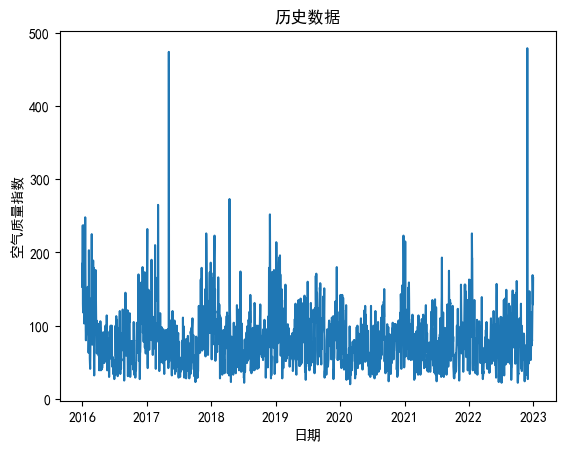

2023-01-01    131.664817
2023-01-02    113.779310
2023-01-03    103.999164
2023-01-04     97.782661
2023-01-05     97.108866
                 ...    
2023-12-27     95.317181
2023-12-28     95.323635
2023-12-29     95.326646
2023-12-30     95.327431
2023-12-31     95.329576
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


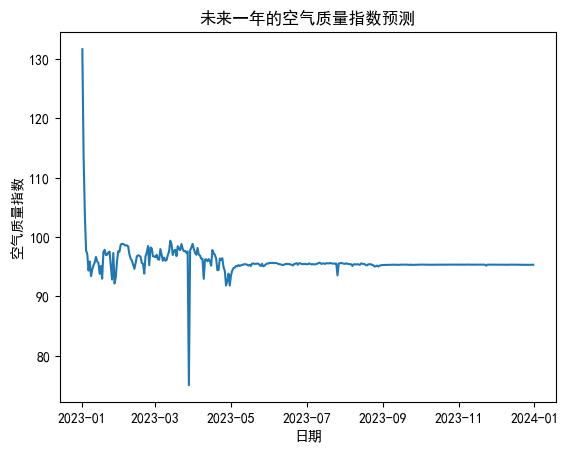

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False

# 读取Excel文件并转换为时间序列
df = pd.read_excel(r'C:\Users\江东大宝\Desktop\2016-2022年城区空气质量指数_预处理完毕.xlsx')
df['日期'] = pd.to_datetime(df['日期'])
df_data = df[['日期', '空气质量指数']]
df_data.set_index('日期', inplace=True)

# 将时间序列数据转换为带有固定日度频率的形式
df_data_daily = df_data.resample('D').mean()

# 绘制AQI时间序列图
plt.plot(df_data)
plt.xlabel('日期')
plt.ylabel('空气质量指数')
plt.title('历史数据')
plt.show()

# 拟合SARIMA模型并进行预测
model = SARIMAX(df_data_daily, order=(1, 1, 1), seasonal_order=(1, 0, 1, 120))
results = model.fit()
forecast = results.forecast(steps=365)  # 预测未来365天的数据

# 显示预测结果7
print(forecast)


# 绘制AQI时间序列图
plt.plot(forecast)
plt.xlabel('日期')
plt.ylabel('空气质量指数')
plt.title('未来一年的空气质量指数预测')
plt.show()